In [1]:
import os
import sys
HOME_DIR = '/Users/anhdang/Documents/Github/COS40007-Artificial-Intelligence-for-Engineering'
os.chdir(HOME_DIR)

DATASETS_DIR = f'{HOME_DIR}/datasets'
DATA_DIR = f'{DATASETS_DIR}/01'
DATASET_FILE = f'{DATA_DIR}/CCPP/Folds5x2_pp.ods'

print(f'HOME_DIR: {HOME_DIR}')
print(f'DATASETS_DIR: {DATASETS_DIR}')
print(f'DATA_DIR: {DATA_DIR}')
print(f'DATASET_FILE: {DATASET_FILE}')


HOME_DIR: /Users/anhdang/Documents/Github/COS40007-Artificial-Intelligence-for-Engineering
DATASETS_DIR: /Users/anhdang/Documents/Github/COS40007-Artificial-Intelligence-for-Engineering/datasets
DATA_DIR: /Users/anhdang/Documents/Github/COS40007-Artificial-Intelligence-for-Engineering/datasets/01
DATASET_FILE: /Users/anhdang/Documents/Github/COS40007-Artificial-Intelligence-for-Engineering/datasets/01/CCPP/Folds5x2_pp.ods


In [2]:
!pip install --upgrade pip --quiet
!pip install -r requirements.txt --quiet

In [3]:
import json
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from ucimlrepo import fetch_ucirepo 

In [4]:
# Fetch dataset 
combined_cycle_power_plant = fetch_ucirepo(id=294) 

# Dataset Information 
print(json.dumps(combined_cycle_power_plant.metadata, indent=2))
combined_cycle_power_plant.variables

{
  "uci_id": 294,
  "name": "Combined Cycle Power Plant",
  "repository_url": "https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant",
  "data_url": "https://archive.ics.uci.edu/static/public/294/data.csv",
  "abstract": "The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load. ",
  "area": "Computer Science",
  "tasks": [
    "Regression"
  ],
  "characteristics": [
    "Multivariate"
  ],
  "num_instances": 9568,
  "num_features": 4,
  "feature_types": [
    "Real"
  ],
  "demographics": [],
  "target_col": [
    "PE"
  ],
  "index_col": null,
  "has_missing_values": "no",
  "missing_values_symbol": null,
  "year_of_dataset_creation": 2014,
  "last_updated": "Mon Mar 04 2024",
  "dataset_doi": "10.24432/C5002N",
  "creators": [
    "Pnar Tfekci",
    "Heysem Kaya"
  ],
  "intro_paper": {
    "title": "Prediction of full load electrical power output of a base load operated c

,name,role,type,demographic,description,units,missing_values
0,AT,Feature,Continuous,None,in the range 1.81°C and 37.11°C,C,no
1,V,Feature,Continuous,None,in teh range 25.36-81.56 cm Hg,cm Hg,no
2,AP,Feature,Continuous,None,in the range 992.89-1033.30 milibar,milibar,no
3,RH,Feature,Continuous,None,in the range 25.56% to 100.16%,%,no
4,PE,Target,Continuous,None,420.26-495.76 MW,MW,no


In [5]:
#NOTE:
# 1. AT - Ambient Temperature
# 2. V - Exhaust Vacuum
# 3. AP - Ambient Pressure
# 4. RH - Relative Humidity
# 5. PE - Electrical Energy Output

#TODO: DATASET EXPLORATION
# 1. Load the dataset
# 2. Display the first 5 rows
# 3. Display the last 5 rows
# 4. Display the summary statistics
# 5. Display the missing values
# 6. Display the correlation matrix
# 7. Display the pairplot
# 8. Display the boxplot
# 9. Display the scatterplot
# 10. Display the distribution plot
# 11. Display the heatmap
# 12. Display the jointplot
# 13. Display the regplot

#TODO: REGRESSION MODEL - NORMAL DATASET
# 1. Split the dataset into training and testing sets
# 2. Train the model
# 3. Evaluate the model
# 4. Predict the model

#TODO: TREE BASED MODEL - NORMAL DATASET
# 1. Split the dataset into training and testing sets
# 2. Train the model
# 3. Evaluate the model
# 4. Predict the model

#TODO: FEATURE ENGINEERING
# 1. Feature Scaling
# 2. Feature Selection
# 3. Feature Extraction
# 4. Feature Transformation

#TODO: REGRESSION MODEL - FEATURE ENGINEERED DATASET
# 1. Split the dataset into training and testing sets
# 2. Train the model
# 3. Evaluate the model
# 4. Predict the model

#TODO: TREE BASED MODEL - FEATURE ENGINEERED DATASET
# 1. Split the dataset into training and testing sets
# 2. Train the model
# 3. Evaluate the model
# 4. Predict the model

# INITIALIZING DATASET

In [6]:
df = pd.read_excel(DATASET_FILE, engine='odf')
print(df)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


# DATASET EXPLORATION

In [7]:
# Display the first 5 rows
print(df.head(5))

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [8]:
# Display the last 5 rows
print(df.tail(5))

         AT      V       AP     RH      PE
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28


In [9]:
# Display the summary statistics
print(df.describe())

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


In [10]:
# Display the missing values
print(df.isnull().sum())

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [11]:
# Display the correlation matrix
print(df.corr())

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


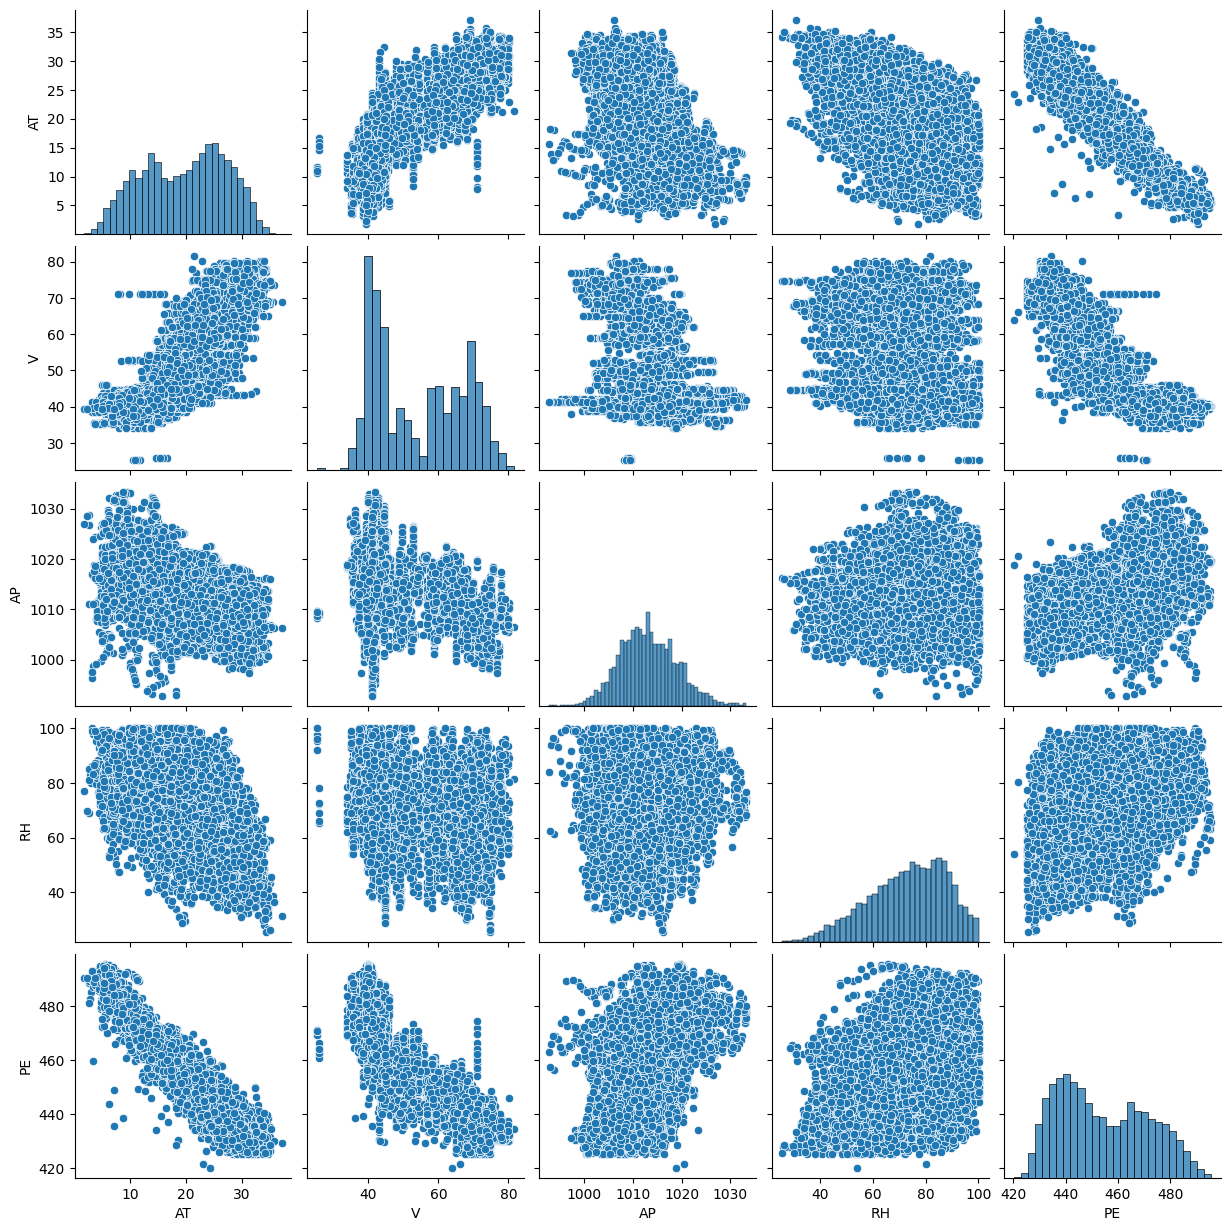

In [12]:
# Display the pairplot
sns.pairplot(df)

<Axes: >

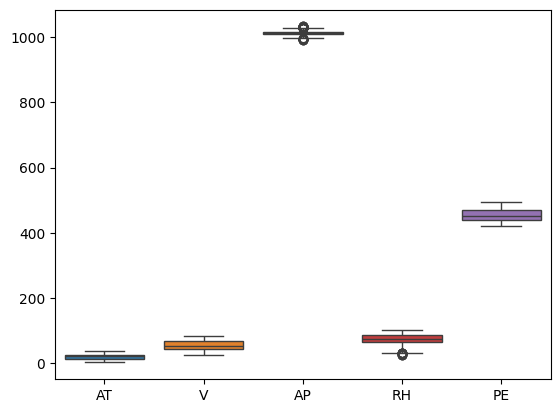

In [13]:
# Display the boxplot
sns.boxplot(data=df)

<Axes: >

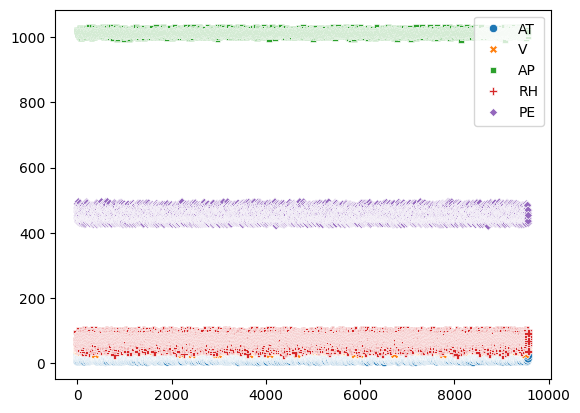

In [14]:
# Display the scatterplot
sns.scatterplot(data=df)

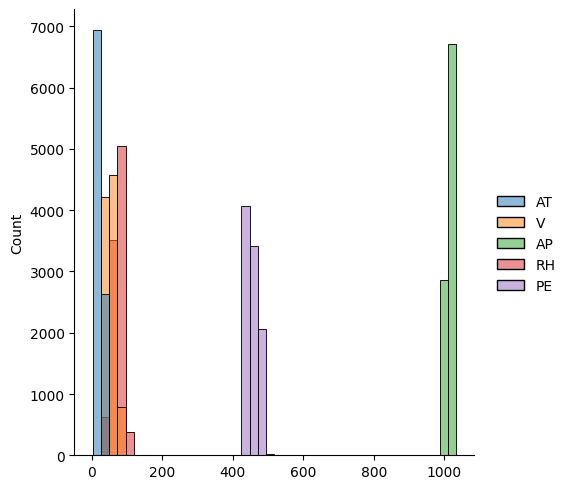

In [15]:
# Display the distribution plot
sns.displot(data=df)

<Axes: >

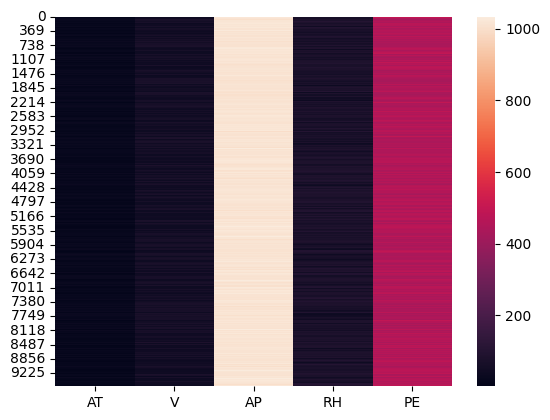

In [16]:
# Display the heatmap
sns.heatmap(data=df)

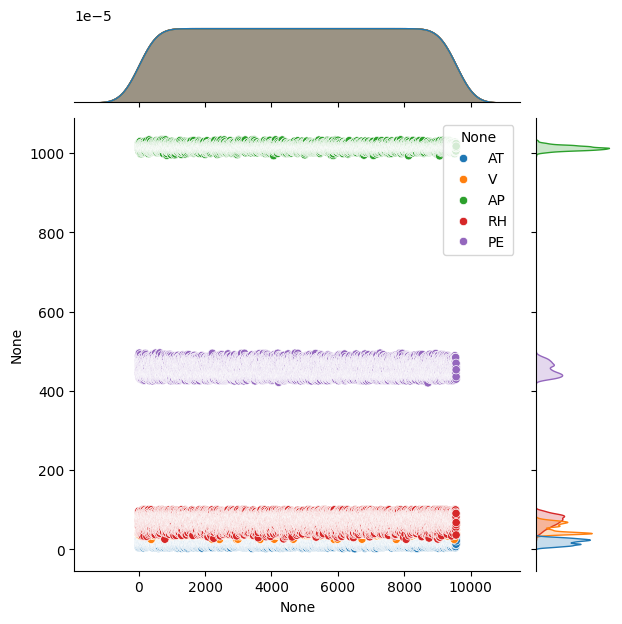

In [17]:
# Display the jointplot
sns.jointplot(data=df)

<Axes: xlabel='AT', ylabel='PE'>

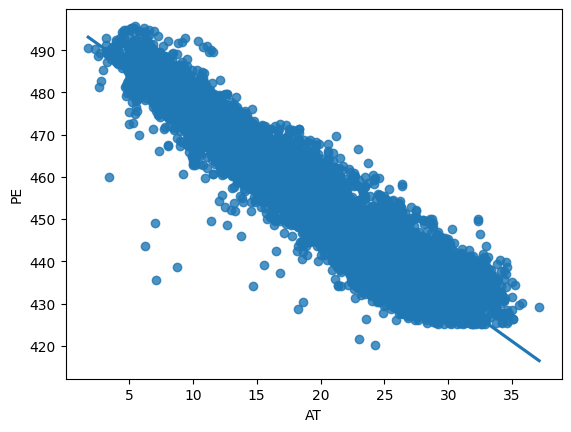

In [18]:
# Display the regplot for AT and PE
sns.regplot(x='AT', y='PE', data=df)

<Axes: xlabel='V', ylabel='PE'>

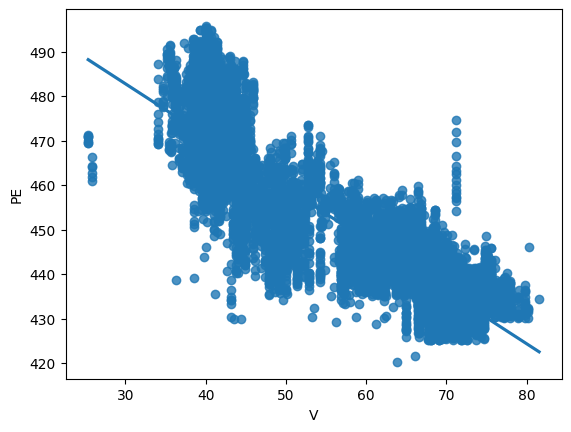

In [19]:
# Display the regplot for V and PE
sns.regplot(x='V', y='PE', data=df)

<Axes: xlabel='AP', ylabel='PE'>

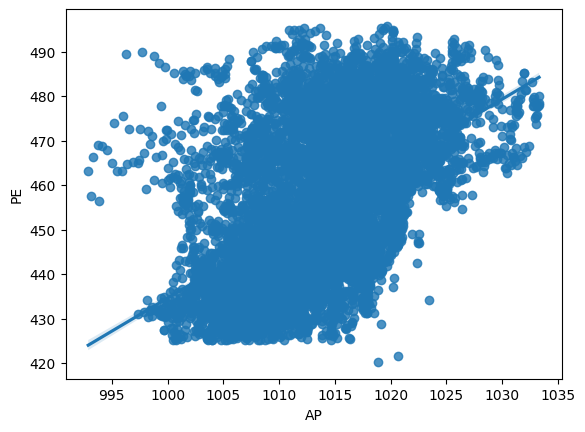

In [20]:
# Display the regplot for AP and PE
sns.regplot(x='AP', y='PE', data=df)

<Axes: xlabel='RH', ylabel='PE'>

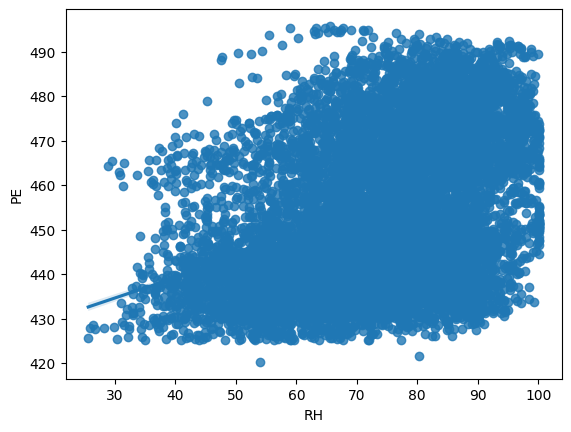

In [21]:
# Display the regplot for RH and PE
sns.regplot(x='RH', y='PE', data=df)

# Helper Function

In [22]:
# Display the model predictions
def plot_actual_vs_predicted(name, y_test, y_pred, num_values=None):
    import matplotlib.pyplot as plt
    
    if num_values is not None:
        y_test = y_test[:num_values]
        y_pred = y_pred[:num_values]
    
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Index')
    plt.ylabel('PE')
    plt.title(f'{name} - Actual vs Predicted')
    plt.legend()
    plt.show()

# Feature + Target Cols

In [23]:
#NOTE: REUSED VAR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Feature Columns 
X = df[['AT', 'V', 'AP', 'RH']]
X_normalized = scaler.fit_transform(X)

# Target Column
y = df['PE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print(f'X: {X.size}')
print(f'y: {y.size}')
print("Original Shape:", X.shape)
print("Normalized Shape:", X_normalized.shape)

X: 38272
y: 9568
Original Shape: (9568, 4)
Normalized Shape: (9568, 4)


# REGRESSION MODEL ON NORMAL DATASET

In [24]:
# Initialize the linear regression model
reg_model = LinearRegression()
print(reg_model)

LinearRegression()


Fit and Evaluate

In [25]:
# Train the model
reg_model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Evaluate the model
train_score = reg_model.score(X_train, y_train)

In [27]:
# Predict the model
y_pred = reg_model.predict(X_test)

In [28]:
# Print out the necessary information for the Regression model
print(f'Training Score: {train_score}')
print(f'Predictions: {y_pred}')
print(f'Coefficients: {reg_model.coef_}')
print(f'Intercept: {reg_model.intercept_}')
print(f'Equation: y = {reg_model.coef_[0]} * AT + {reg_model.coef_[1]} * V + {reg_model.coef_[2]} * AP + {reg_model.coef_[3]} * RH + {reg_model.intercept_}')
print(f'Accuracy: {reg_model.score(X_test, y_test)}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')


Training Score: 0.928331545565795
Predictions: [455.68020791 438.73212215 434.16444    ... 482.16817365 435.41524413
 458.76150613]
Coefficients: [-14.79909089  -2.94926621   0.3693725   -2.30844154]
Intercept: 454.37288174293514
Equation: y = -14.799090887517988 * AT + -2.9492662148344633 * V + 0.3693725039024655 * AP + -2.3084415408470145 * RH + 454.37288174293514
Accuracy: 0.9301046431962188
R² Score: 0.9301
Mean Squared Error (MSE): 20.2737
Mean Absolute Error (MAE): 3.5959


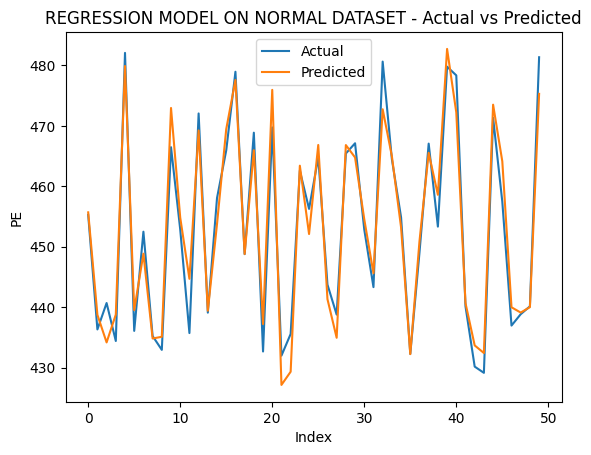

In [29]:
plot_actual_vs_predicted('REGRESSION MODEL ON NORMAL DATASET', y_test, y_pred, 50)

# TREE BASED MODEL ON NORMAL DATASET

In [30]:
tree_model = DecisionTreeRegressor()
print(tree_model)

DecisionTreeRegressor()


Fit and Evaluate

In [31]:
# Train the model
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
# Evaluate the model
train_score = tree_model.score(X_train, y_train)

In [33]:
# Predict the model
y_pred = tree_model.predict(X_test)

Decision Tree Model Information:
Training Score: 1.0
Predictions: [456.57 436.96 438.04 ... 482.39 429.28 456.35]
Feature Importances: [0.90569293 0.05651721 0.02077455 0.01701531]
R² Score: 0.9319
Mean Squared Error (MSE): 19.7614
Mean Absolute Error (MAE): 3.0240


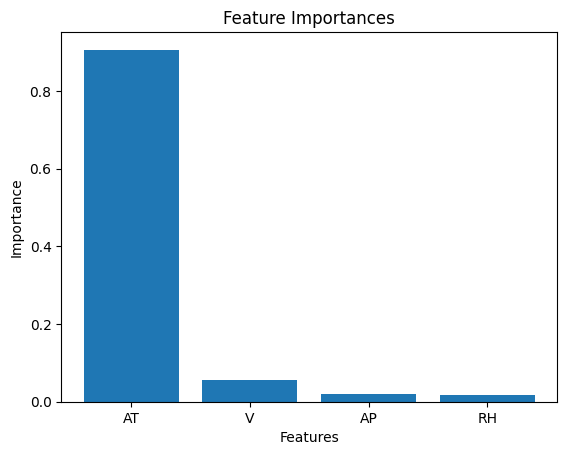

In [34]:
# Print out the necessary information for the Decision Tree model
print(f'Decision Tree Model Information:')
print(f'Training Score: {train_score}')
print(f'Predictions: {y_pred}')
print(f'Feature Importances: {tree_model.feature_importances_}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Plot feature importances
plt.bar(X.columns, tree_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

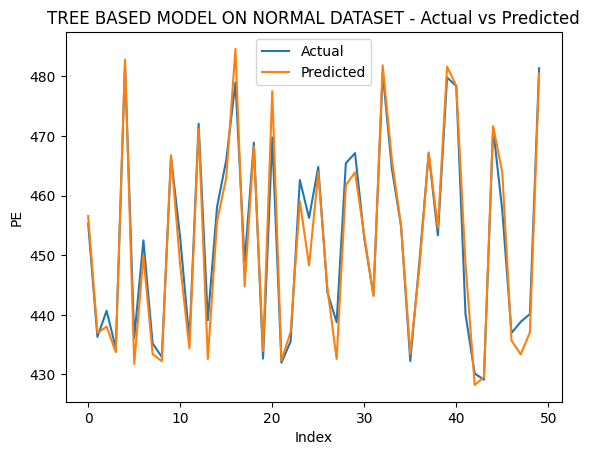

In [35]:
plot_actual_vs_predicted('TREE BASED MODEL ON NORMAL DATASET', y_test, y_pred, 50)

# FEATURE ENGINEERING DATASET

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures


# Feature Selection | Option 1
# Select the top k features based on their relevance to the target variable y
k_best_features = 2
selector = SelectKBest(score_func=f_regression, k=k_best_features)
X_selected = selector.fit_transform(X_normalized, y)

# Feature Extraction | Option 2
# Reduce dimensionality while retaining as much variance as possible
n_components_pca = 2
pca = PCA(n_components=n_components_pca)
X_pca = pca.fit_transform(X_normalized)

# Feature Transformation | Option 3 (Optional)
# Generate polynomial features for the chosen dataset (X_scaled, X_selected, or X_pca)
degree_poly = 2
poly = PolynomialFeatures(degree=degree_poly)

# Choose which transformation to apply PolynomialFeatures to:

# Option 1: Apply Polynomial Features to the scaled features
X_poly_scaled = poly.fit_transform(X_normalized)

# Option 2: Apply Polynomial Features to the selected features
# X_poly_selected = poly.fit_transform(X_selected)

# Option 3: Apply Polynomial Features to the PCA components
# X_poly_pca = poly.fit_transform(X_pca)

# Print shapes to verify transformations (optional)
print("Original Shape:", X.shape)
print("Normalized Shape:", X_normalized.shape)
print("Selected Shape:", X_selected.shape)
print("PCA Shape:", X_pca.shape)
print("Poly Scaled Shape:", X_poly_scaled.shape)
# print("Poly Selected Shape:", X_poly_selected.shape)
# print("Poly PCA Shape:", X_poly_pca.shape)

# Split Feature Engineereed Dataset
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

Original Shape: (9568, 4)
Normalized Shape: (9568, 4)
Selected Shape: (9568, 2)
PCA Shape: (9568, 2)
Poly Scaled Shape: (9568, 15)
X_train shape: (7654, 15)
X_test shape: (1914, 15)
y_train shape: (7654,)
y_test shape: (1914,)


# REGRESSION MODEL - FEATURE ENGINEERED DATASET

In [37]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Evaluate the model
train_score = reg_model.score(X_train, y_train)

In [39]:
# Predict the model
y_pred = reg_model.predict(X_test)

In [40]:
# Print out the necessary information for the Regression model
print(f'Training Score: {train_score}')
print(f'Predictions: {y_pred}')
print(f'Coefficients: {reg_model.coef_}')
print(f'Intercept: {reg_model.intercept_}')
print(f'Equation: y = {reg_model.coef_[0]} * AT + {reg_model.coef_[1]} * V + {reg_model.coef_[2]} * AP + {reg_model.coef_[3]} * RH + {reg_model.intercept_}')
print(f'Accuracy: {reg_model.score(X_test, y_test)}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Training Score: 0.9377092268931407
Predictions: [454.98956396 439.05053394 434.9290992  ... 483.28779322 435.56138533
 455.44208103]
Coefficients: [ 0.00000000e+00 -1.34240367e+01 -3.80720801e+00  7.60908552e-01
 -1.78462369e+00  1.00085045e+00  9.80509667e-01  1.39188923e-01
 -6.01410937e-01 -9.84665994e-02  1.71880579e-01  1.24857352e-02
 -2.64540651e-01 -3.15554253e-01 -4.09857299e-01]
Intercept: 453.17950007240654
Equation: y = 0.0 * AT + -13.424036734708132 * V + -3.807208013099254 * AP + 0.7609085522917277 * RH + 453.17950007240654
Accuracy: 0.9382776706597626
R² Score: 0.9383
Mean Squared Error (MSE): 17.9031
Mean Absolute Error (MAE): 3.3513


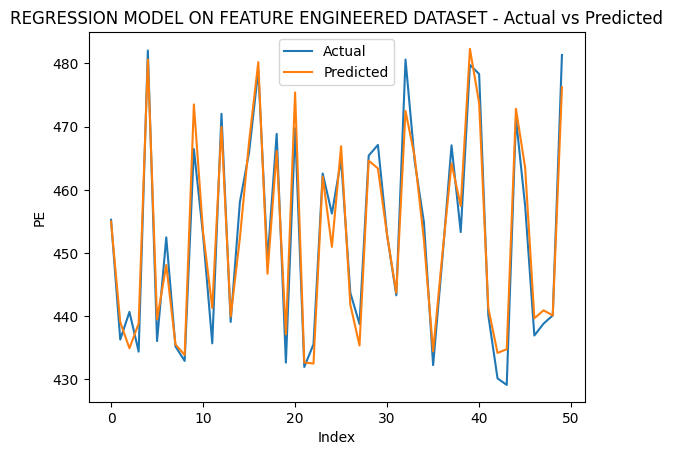

In [41]:
plot_actual_vs_predicted('REGRESSION MODEL ON FEATURE ENGINEERED DATASET', y_test, y_pred, 50)

# TREE BASED MODEL - FEATURE ENGINEERED DATASET

In [42]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [43]:
# Evaluate the model
train_score = tree_model.score(X_train, y_train)

In [44]:
# Predict the model
y_pred = tree_model.predict(X_test)

Decision Tree Model Information:
Training Score: 1.0
Predictions: [453.62 435.06 438.04 ... 482.39 436.59 456.35]
Feature Importances: [0.         0.82207506 0.01244123 0.00431    0.00335134 0.00777429
 0.10544418 0.0095305  0.00389307 0.005738   0.00546186 0.00511263
 0.00334797 0.00545552 0.00606436]
R² Score: 0.9257
Mean Squared Error (MSE): 21.5408
Mean Absolute Error (MAE): 3.1961


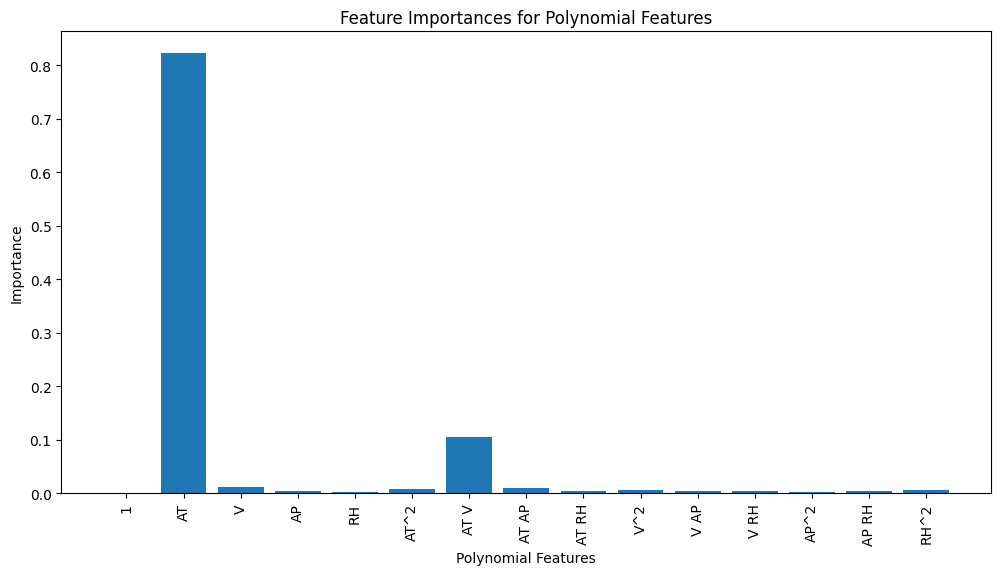

In [45]:
# Print out the necessary information for the Decision Tree model
print(f'Decision Tree Model Information:')
print(f'Training Score: {train_score}')
print(f'Predictions: {y_pred}')
print(f'Feature Importances: {tree_model.feature_importances_}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Plot feature importances
feature_names = poly.get_feature_names_out(X.columns)

# Ensure the number of features matches the length of feature importances
assert len(feature_names) == len(tree_model.feature_importances_)

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_names, tree_model.feature_importances_)
plt.xlabel('Polynomial Features')
plt.ylabel('Importance')
plt.title('Feature Importances for Polynomial Features')
plt.xticks(rotation=90)  # Rotate feature names for better visibility
plt.show()

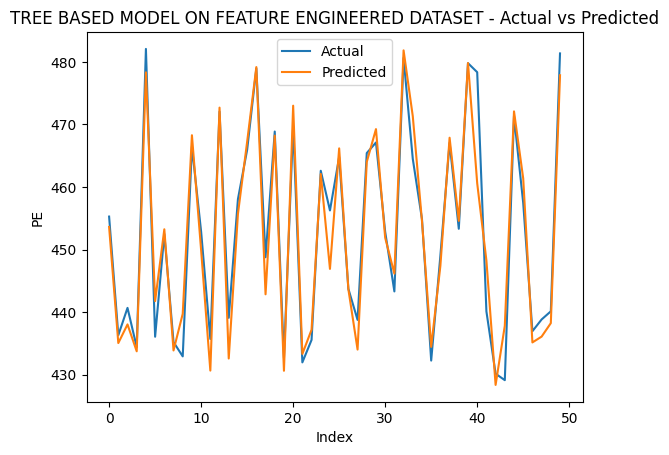

In [46]:
plot_actual_vs_predicted('TREE BASED MODEL ON FEATURE ENGINEERED DATASET', y_test, y_pred, 50)